## Project:
### Business Objective:
### The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

Data Set Details: 
The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385. 

In that way, this problem has the 12 following variables:

make, car brand under study.
model, the specific model of the car.
vehicle_class, car body type of the car.
engine_size, size of the car engine, in Liters.
cylinders, number of cylinders.
transmission, "A" for Automatic', "AM" for Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously variable', "M" for 'Manual'.
fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.
fuel_consumption_city, City fuel consumption ratings, in liters per 100 kilometers.
fuel_consumption_hwy, Highway fuel consumption ratings, in liters per 100 kilometers.
fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.
fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).
co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.
Acceptance Criterion: Need to deploy the end results using Flask /Streamlit etc


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("co2_emissions.csv")
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


## EDA

In [3]:
# 1. Summary Statistics
summary_stats = df.describe()
print(summary_stats)

       engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7385.000000  7385.000000            7385.000000           7385.000000   
mean      3.160068     5.615030              12.556534              9.041706   
std       1.354170     1.828307               3.500274              2.224456   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     7385.000000                 7385.000000   
mean                        10.975071                   27.481652   
std                          2.892506                    7.231879   
min

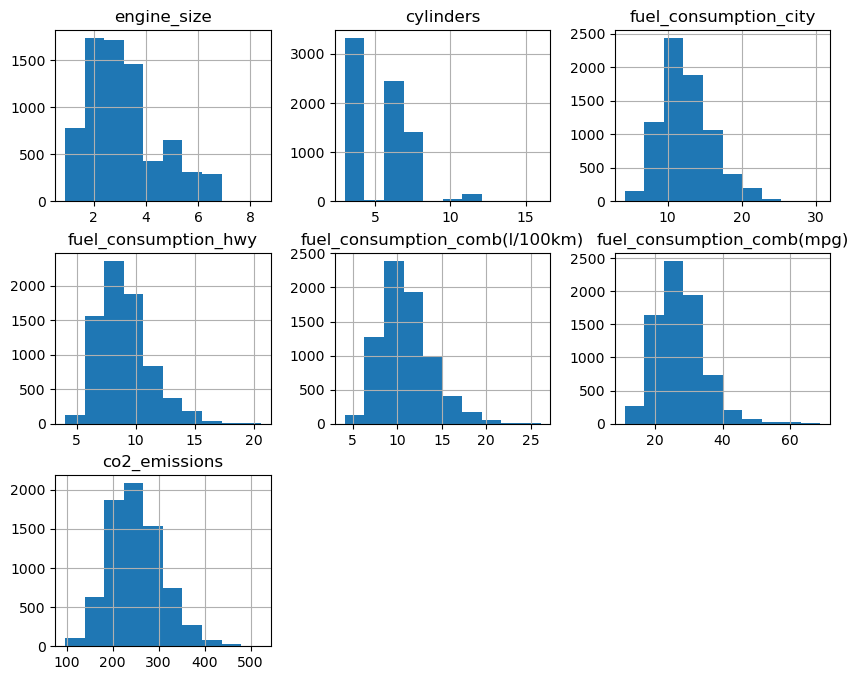

In [4]:
# 2. Data Visualization
# Histograms
df.hist(figsize=(10, 8))
plt.show()

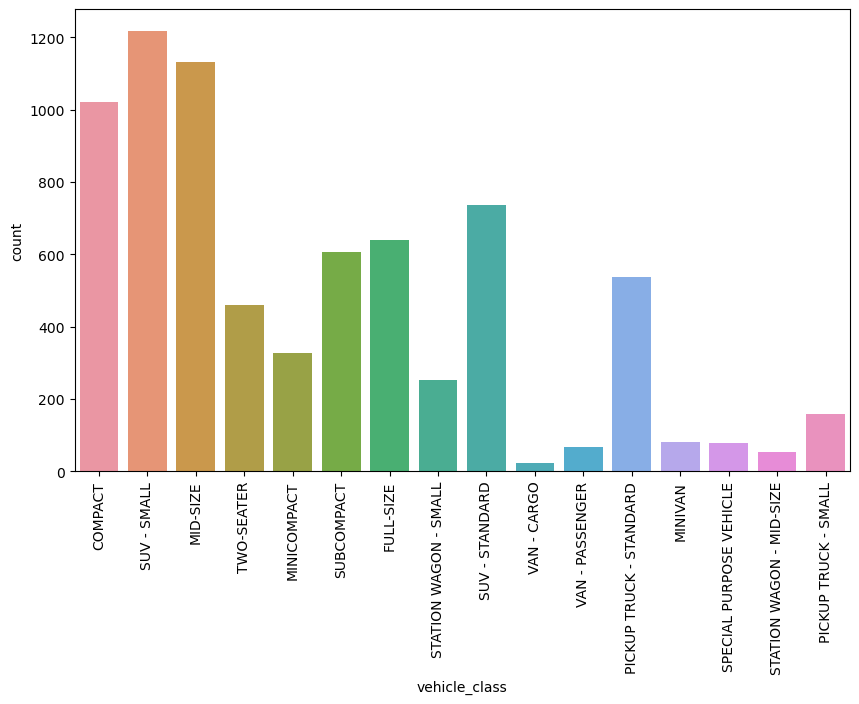

In [5]:
# Bar plots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicle_class', data=df)
plt.xticks(rotation=90)
plt.show()

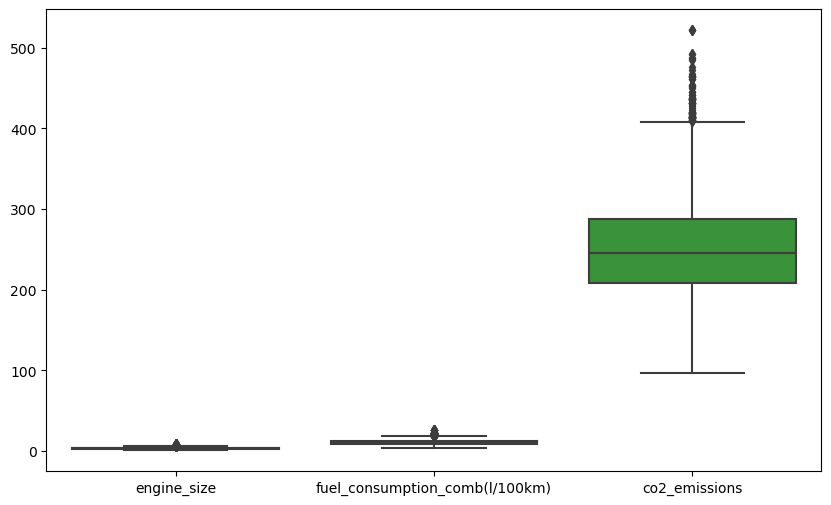

In [6]:
# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['engine_size', 'fuel_consumption_comb(l/100km)', 'co2_emissions']])
plt.show()

<Figure size 1000x600 with 0 Axes>

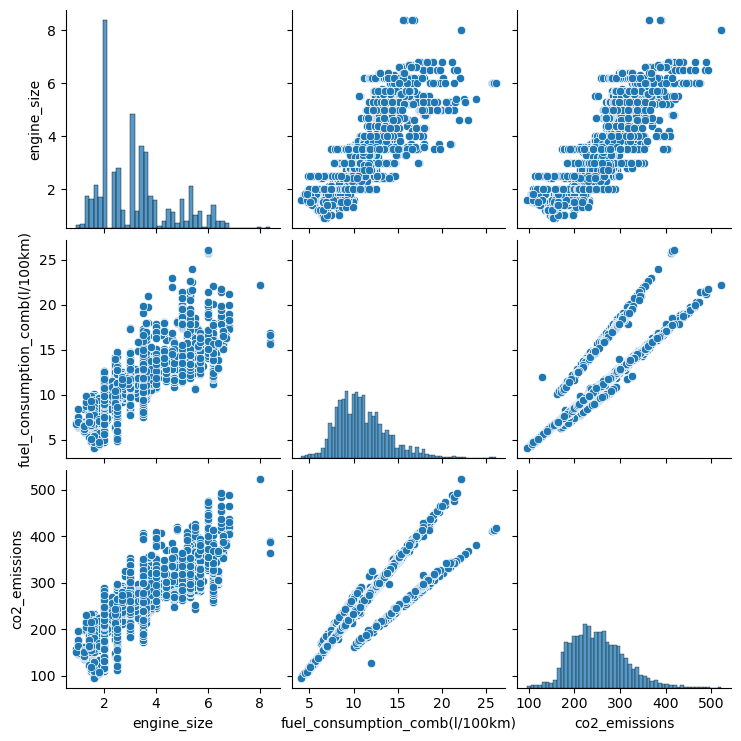

In [7]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.pairplot(df[['engine_size', 'fuel_consumption_comb(l/100km)', 'co2_emissions']])
plt.show()

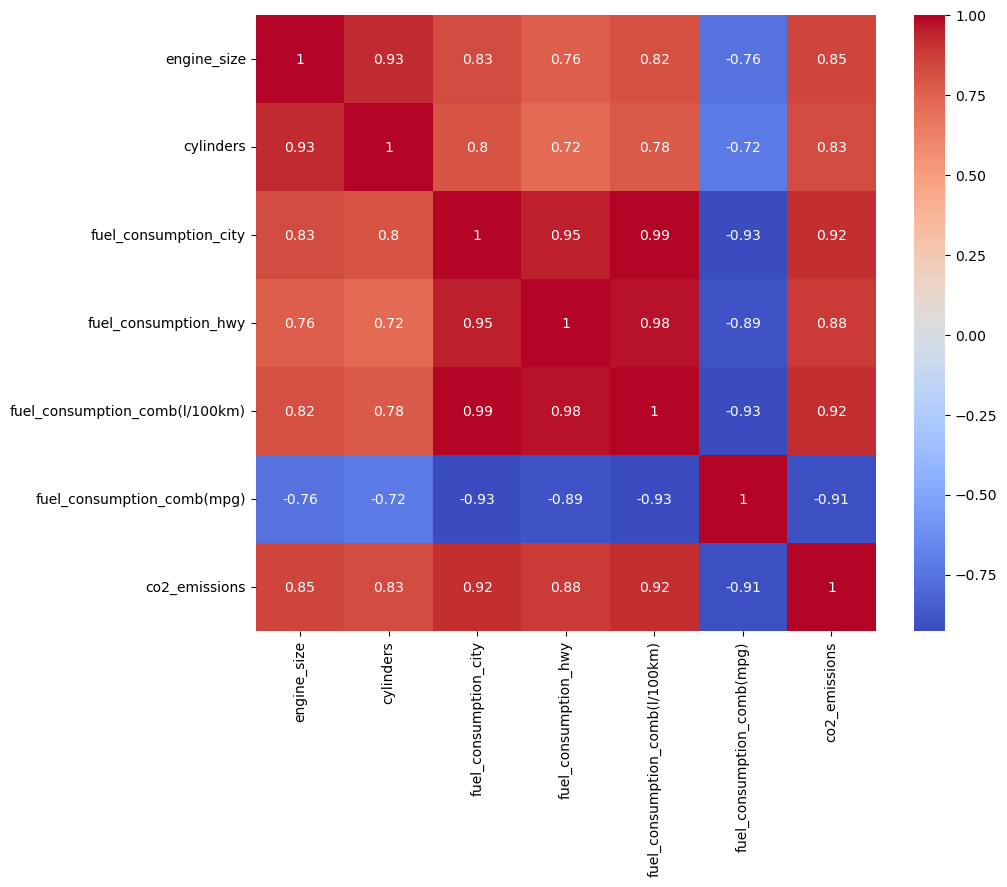

In [8]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
# 3. Missing Values Analysis
missing_values = df.isnull().sum()
print(missing_values)

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64


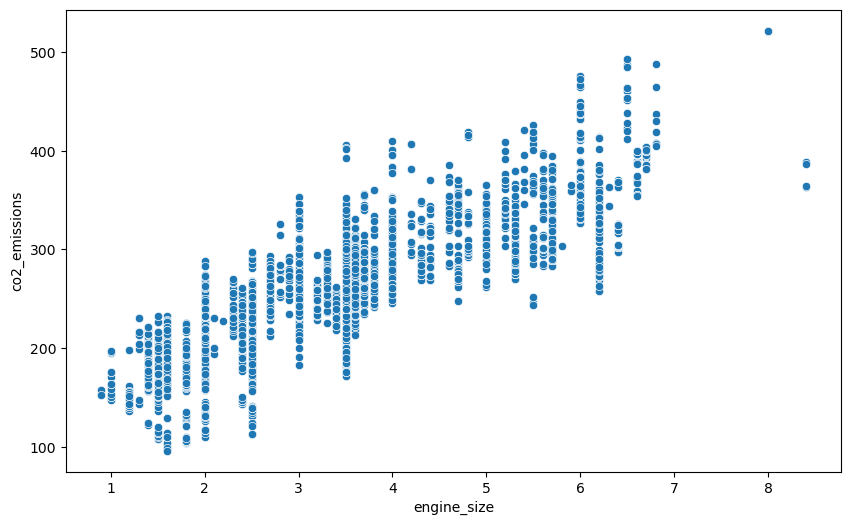

In [10]:
# 4. Feature Relationships
# Scatter plot of engine_size vs. co2_emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size', y='co2_emissions', data=df)
plt.show()

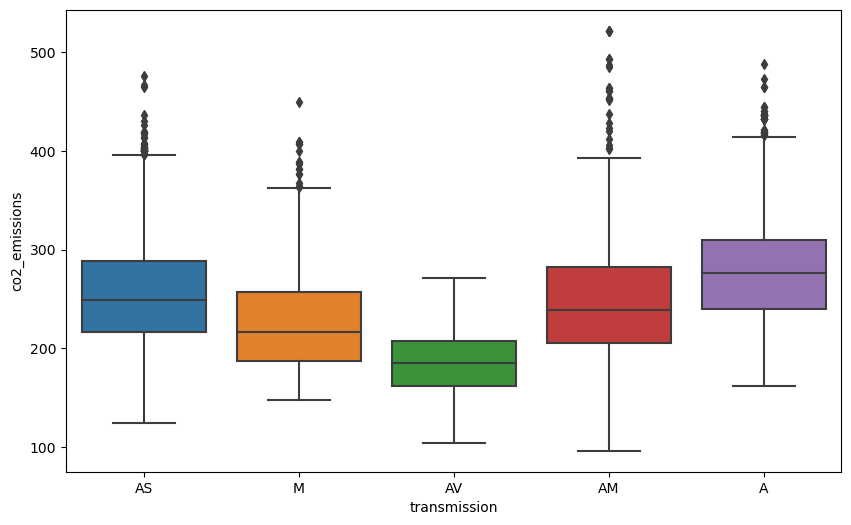

In [11]:
# Categorical plot of transmission vs. co2_emissions
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='co2_emissions', data=df)
plt.xticks(rotation=0)
plt.show()

In [12]:
# 5. Feature Engineering Insights: This would involve creating new features or exploring interactions,
# Create interaction features
df['engine_size_cylinders_interaction'] = df['engine_size'] * df['cylinders']
df['fuel_consumption_comb_per_cylinder'] = df['fuel_consumption_comb(l/100km)'] / df['cylinders']
print(df['engine_size_cylinders_interaction'])
print(df['fuel_consumption_comb_per_cylinder'])

0        8.0
1        9.6
2        6.0
3       21.0
4       21.0
        ... 
7380     8.0
7381     8.0
7382     8.0
7383     8.0
7384     8.0
Name: engine_size_cylinders_interaction, Length: 7385, dtype: float64
0       2.125000
1       2.400000
2       1.475000
3       1.850000
4       1.766667
          ...   
7380    2.350000
7381    2.475000
7382    2.575000
7383    2.475000
7384    2.675000
Name: fuel_consumption_comb_per_cylinder, Length: 7385, dtype: float64


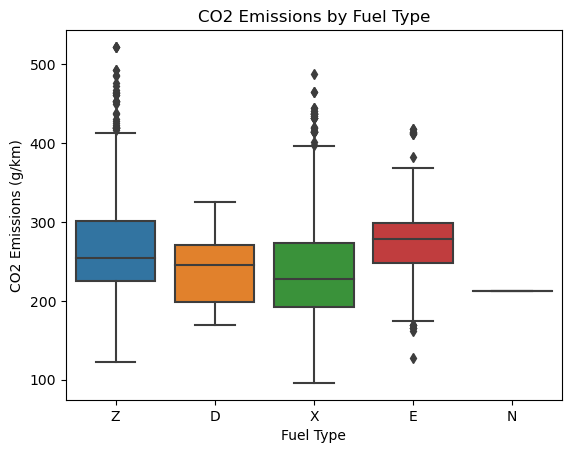

In [13]:
# 6. Outlier Detection: This can be done visually using box plots or programmatically using z-scores.
# Visual outlier detection using box plots
sns.boxplot(x='fuel_type', y='co2_emissions', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

In [14]:
from scipy import stats

z_scores = stats.zscore(df['co2_emissions'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
print(outliers)

               make                       model    vehicle_class  engine_size  \
75          BENTLEY                    MULSANNE         MID-SIZE          6.8   
224       CHEVROLET      EXPRESS 2500 PASSENGER  VAN - PASSENGER          6.0   
227       CHEVROLET      EXPRESS 3500 PASSENGER  VAN - PASSENGER          6.0   
349            FORD                  E350 WAGON  VAN - PASSENGER          6.8   
448             GMC       SAVANA 2500 PASSENGER  VAN - PASSENGER          6.0   
451             GMC       SAVANA 3500 PASSENGER  VAN - PASSENGER          6.0   
1323      CHEVROLET      EXPRESS 2500 PASSENGER  VAN - PASSENGER          6.0   
1324      CHEVROLET  EXPRESS 2500 PASSENGER FFV  VAN - PASSENGER          6.0   
1327      CHEVROLET      EXPRESS 3500 PASSENGER  VAN - PASSENGER          6.0   
1328      CHEVROLET  EXPRESS 3500 PASSENGER FFV  VAN - PASSENGER          6.0   
1528            GMC       SAVANA 2500 PASSENGER  VAN - PASSENGER          6.0   
1529            GMC   SAVANA

In [15]:
# 7. Correlation Analysis: Already done using heatmap.

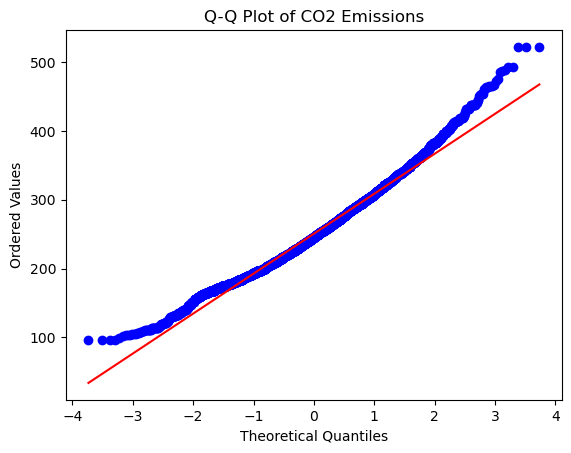

In [16]:
# 8. Data Distribution: Check normality assumption using Q-Q plots or statistical tests.
# Q-Q plot for CO2 emissions
import scipy.stats as stats

stats.probplot(df['co2_emissions'], dist="norm", plot=plt)
plt.title('Q-Q Plot of CO2 Emissions')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

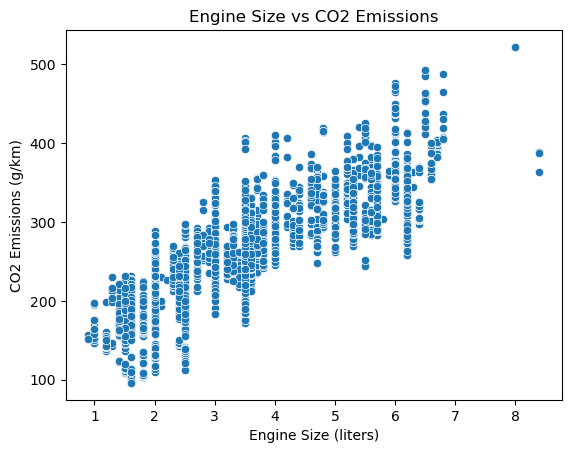

In [17]:
# 9. Model Assumptions: For linear regression, check for linearity, homoscedasticity, and normality of residuals.
# Check linearity assumption with scatter plots
sns.scatterplot(x='engine_size', y='co2_emissions', data=df)
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (liters)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

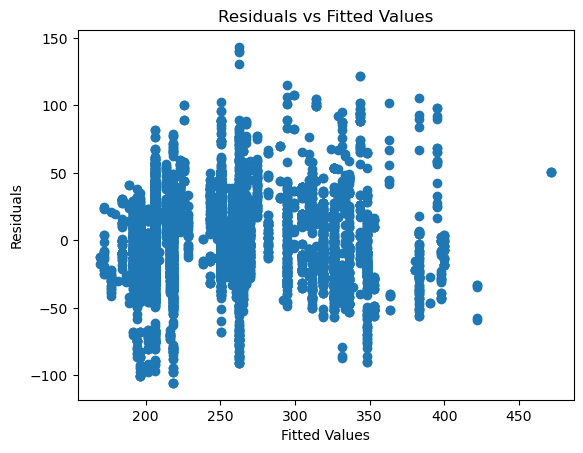

In [18]:
# Check homoscedasticity assumption with residuals vs. fitted plot
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_goldfeldquandt

import statsmodels.api as sm

# Assuming X contains your independent variables and y contains your dependent variable
X = df[['engine_size', 'cylinders']]
y = df['co2_emissions']

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Check homoscedasticity assumption with residuals vs. fitted plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

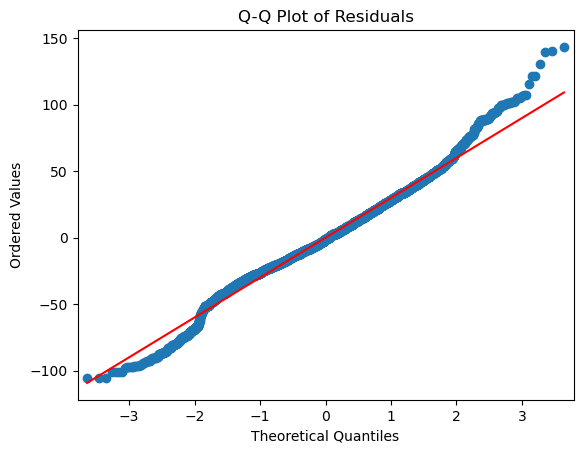

In [19]:
# Check normality of residuals with Q-Q plot
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

### Multicollinearity

In [20]:
# Multicollinearity Detection using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Assuming X contains your independent variables
X = df[['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)']]

vif_scores = calculate_vif(X)
print(vif_scores)

                          Feature        VIF
0                     engine_size  39.323937
1                       cylinders  60.237544
2  fuel_consumption_comb(l/100km)  26.808043


### Feature Selection

In [21]:
from sklearn.linear_model import LassoCV

# Assuming X contains your independent variables and y contains your dependent variable
X = df[['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)']]
y = df['co2_emissions']

# Initialize LassoCV model
lasso = LassoCV(cv=5)

# Fit the model
lasso.fit(X, y)

# Get selected features
selected_features = X.columns[lasso.coef_ != 0]
print(selected_features)


Index(['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)'], dtype='object')


In [22]:
# Feature Selection using Lasso Regression:
from sklearn.linear_model import LassoCV

# Assuming X contains your independent variables and y contains your dependent variable
X = df[['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)']]
y = df['co2_emissions']

# Initialize LassoCV model
lasso = LassoCV(cv=5)

# Fit the model
lasso.fit(X, y)

# Get selected features
selected_features = X.columns[lasso.coef_ != 0]
print(selected_features)

Index(['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)'], dtype='object')


## LinearRegression

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X contains your independent variables and y contains your dependent variable
X = df[['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)']]
y = df['co2_emissions']

# Initialize linear regression model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print(selected_features)


Index(['fuel_consumption_comb(l/100km)'], dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains your independent variables and y contains your dependent variable
X = df[['engine_size', 'cylinders', 'fuel_consumption_comb(l/100km)']]
y = df['co2_emissions']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 421.9223319051996
Root Mean Squared Error: 20.54074808533515
R-squared: 0.8773348735033226


## RandomForestRegresso

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest regressor
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Mean Squared Error: 92.43689721387929
Root Mean Squared Error: 9.614410913513073
R-squared: 0.9731258982227835


## GradientBoostingRegressor

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting regressor
gbm = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
random_search_gbm.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for Gradient Boosting:", random_search_gbm.best_params_)

# Evaluate the best model
best_model_gbm = random_search_gbm.best_estimator_
y_pred_gbm = best_model_gbm.predict(X_test)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = mse_gbm ** 0.5
r2_gbm = r2_score(y_test, y_pred_gbm)

print("Mean Squared Error for Gradient Boosting:", mse_gbm)
print("Root Mean Squared Error for Gradient Boosting:", rmse_gbm)
print("R-squared for Gradient Boosting:", r2_gbm)


In [27]:
from sklearn.svm import SVR

# Initialize Support Vector Regression
svr = SVR()

# Define the parameter grid
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize RandomizedSearchCV
random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_grid_svr, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
random_search_svr.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for SVR:", random_search_svr.best_params_)

# Evaluate the best model
best_model_svr = random_search_svr.best_estimator_
y_pred_svr = best_model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Squared Error for SVR:", mse_svr)
print("Root Mean Squared Error for SVR:", rmse_svr)
print("R-squared for SVR:", r2_svr)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVR: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Mean Squared Error for SVR: 235.6164077499058
Root Mean Squared Error for SVR: 15.349801554088762
R-squared for SVR: 0.9314994389350578


##  neural_network

In [28]:
from sklearn.neural_network import MLPRegressor

# Initialize MLPRegressor
mlp = MLPRegressor()

# Define the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid_mlp, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
random_search_mlp.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for MLPRegressor:", random_search_mlp.best_params_)

# Evaluate the best model
best_model_mlp = random_search_mlp.best_estimator_
y_pred_mlp = best_model_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mse_mlp ** 0.5
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Mean Squared Error for MLPRegressor:", mse_mlp)
print("Root Mean Squared Error for MLPRegressor:", rmse_mlp)
print("R-squared for MLPRegressor:", r2_mlp)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for MLPRegressor: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'relu'}
Mean Squared Error for MLPRegressor: 239.41546566936069
Root Mean Squared Error for MLPRegressor: 15.473056119246795
R-squared for MLPRegressor: 0.930394942005128
